Matplotlib is building the font cache; this may take a moment.


Categorical columns removed: ['Name', 'City', 'State', 'Public/Private', 'Website']
Shape after removing missing values: (524, 12)


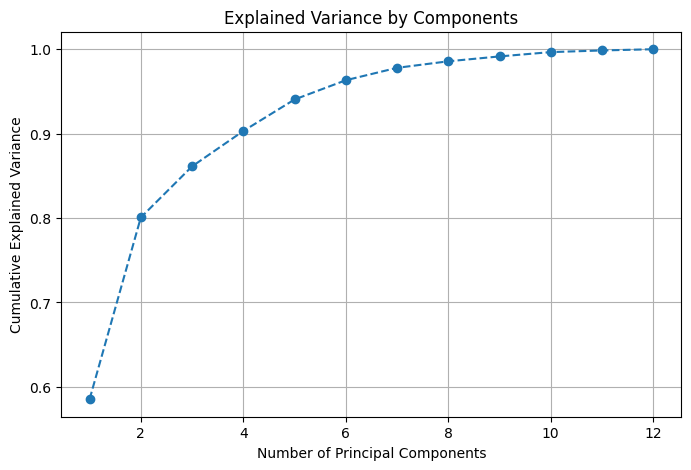

Principal Component Loadings:
       Rank  Undergraduate Population  Student Population  Net Price  \
0 -0.329030                 -0.070172           -0.029764   0.195742   
1 -0.160146                  0.582308            0.586628  -0.312840   
2 -0.139804                  0.248448            0.258355   0.750275   
3  0.222904                  0.256462            0.292533   0.006035   
4 -0.038361                 -0.023024           -0.012166  -0.090273   

   Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
0           0.284110           0.315066       0.282062        -0.295906   
1          -0.286207          -0.200270       0.146288        -0.084669   
2          -0.130729           0.292649       0.039548         0.391798   
3           0.503266           0.353957      -0.339040        -0.471816   
4           0.094441           0.118028       0.835766        -0.154886   

   SAT Lower  SAT Upper  ACT Lower  ACT Upper  
0   0.353329   0.349534   0.359878   0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the CSV Data (instead of Excel)
file_path = "ForbesAmericasTopColleges.csv"  # Ensure it's saved as CSV
df = pd.read_csv(file_path)

# Step 2: Remove Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns removed:", categorical_cols.tolist())
df_numeric = df.drop(columns=categorical_cols)

# Step 3: Remove Rows with Missing Numerical Data
df_cleaned = df_numeric.dropna()
print("Shape after removing missing values:", df_cleaned.shape)

# Step 4: Normalize the Data (Standardization)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Step 5: Perform PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 6: Plot Cumulative Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Step 7: Display Component Loadings
loadings = pd.DataFrame(pca.components_, columns=df_cleaned.columns)
print("Principal Component Loadings:")
print(loadings.head())